# Segundo Dataset: Criação Própria reciclagem 2014 ate 2024

## Problema: Prever quanto o Brasil irá produzir de lixo e reciclar em 2025

In [ ]:
! pip install pandas

In [ ]:
! pip install scikit-learn

In [39]:
import pandas as pd

In [40]:
# df = pd.read_csv("https://raw.githubusercontent.com/rafaelflorentinobarbosa/InteligenciaArtificial/refs/heads/main/Projeto_final/dataset_lixo.csv")
df = pd.read_csv('datasets/dataset_lixo.csv')

In [41]:
df.head(10)

,pais,ano,pib,populacao,lixo_organico,lixo_papel,lixo_metal,lixo_plastico,lixo_vidro,lixo_madeira,lixo_borracha,lixo_entulho,lixo_medico,outros_lixos,total_lixo,lixo_reciclado
0,Brasil,2014,2416000000000,202600000,18100000.0,7400000.0,2900000.0,4400000.0,1650000.0,800000.0,300000.0,2500000.0,400000.0,100000.0,79700000,32000000.0
1,Brasil,2015,2418000000000,204500000,18500000.0,7600000.0,2950000.0,4500000.0,1700000.0,850000.0,320000.0,2600000.0,450000.0,110000.0,81300000,33000000.0
2,Brasil,2016,2384000000000,206100000,19000000.0,7800000.0,3000000.0,4600000.0,1750000.0,900000.0,350000.0,2700000.0,500000.0,120000.0,83000000,34000000.0
3,Brasil,2017,2056000000000,207660000,20000000.0,8000000.0,3100000.0,4800000.0,1800000.0,950000.0,370000.0,2800000.0,550000.0,130000.0,85000000,35000000.0
4,Brasil,2018,2064000000000,209300000,21000000.0,8200000.0,3200000.0,4900000.0,1850000.0,1000000.0,400000.0,2900000.0,600000.0,140000.0,87000000,36000000.0
5,Brasil,2019,2130000000000,210100000,22000000.0,8400000.0,3300000.0,5000000.0,1900000.0,1050000.0,420000.0,3000000.0,650000.0,150000.0,89000000,37000000.0
6,Brasil,2020,2143000000000,211000000,23000000.0,8600000.0,3400000.0,5100000.0,1950000.0,1100000.0,450000.0,3100000.0,700000.0,160000.0,91000000,38000000.0
7,Brasil,2021,2204000000000,212600000,24000000.0,8800000.0,3500000.0,5200000.0,2000000.0,1150000.0,480000.0,3200000.0,750000.0,170000.0,93000000,39000000.0
8,Brasil,2022,2375000000000,214000000,25000000.0,9000000.0,3600000.0,5300000.0,2050000.0,1200000.0,500000.0,3300000.0,800000.0,180000.0,95000000,40000000.0
9,Brasil,2023,2510000000000,215000000,26000000.0,9200000.0,3700000.0,5400000.0,2100000.0,1250000.0,530000.0,3400000.0,850000.0,190000.0,97000000,41000000.0


In [42]:
df.columns

Index(['pais', 'ano', 'pib', 'populacao', 'lixo_organico', 'lixo_papel',
       'lixo_metal', 'lixo_plastico', 'lixo_vidro', 'lixo_madeira',
       'lixo_borracha', 'lixo_entulho', 'lixo_medico', 'outros_lixos',
       'total_lixo', 'lixo_reciclado'],
      dtype='object')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pais            1243 non-null   object 
 1   ano             1243 non-null   int64  
 2   pib             1243 non-null   int64  
 3   populacao       1243 non-null   int64  
 4   lixo_organico   1243 non-null   float64
 5   lixo_papel      1243 non-null   float64
 6   lixo_metal      1243 non-null   float64
 7   lixo_plastico   1243 non-null   float64
 8   lixo_vidro      1243 non-null   float64
 9   lixo_madeira    1243 non-null   float64
 10  lixo_borracha   1243 non-null   float64
 11  lixo_entulho    1243 non-null   float64
 12  lixo_medico     1243 non-null   float64
 13  outros_lixos    1243 non-null   float64
 14  total_lixo      1243 non-null   int64  
 15  lixo_reciclado  770 non-null    float64
dtypes: float64(11), int64(4), object(1)
memory usage: 155.5+ KB


In [68]:
df.describe()

,ano,pib,populacao,lixo_organico,lixo_papel,lixo_metal,lixo_plastico,lixo_vidro,lixo_madeira,lixo_borracha,lixo_entulho,lixo_medico,outros_lixos,total_lixo,lixo_reciclado
count,1243.00000,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,1.243000e+03,7.700000e+02
mean,2019.00000,7.960596e+11,5.693619e+07,7.464151e+06,3.025645e+06,1.270748e+06,2.252561e+06,1.032223e+06,5.374563e+05,4.137538e+05,2.723081e+06,6.201897e+05,4.019579e+06,1.996942e+07,1.122291e+07
std,3.16355,2.586051e+12,1.853911e+08,1.530892e+07,7.301315e+06,3.014951e+06,5.306860e+06,2.208569e+06,1.134260e+06,1.167465e+06,9.205541e+06,1.601438e+06,9.036354e+06,5.496316e+07,2.770905e+07
min,2014.00000,2.800000e+08,8.000000e+02,1.500000e+01,1.000000e+01,3.000000e+00,4.000000e+00,2.000000e+00,1.000000e+00,5.000000e-01,2.000000e+00,2.000000e-01,1.000000e-01,3.700000e+01,2.000000e+01
25%,2016.00000,2.300000e+10,3.200000e+06,9.400000e+05,3.000000e+05,1.400000e+05,2.250000e+05,1.000000e+05,5.800000e+04,3.350000e+04,1.300000e+04,2.100000e+04,9.500000e+04,8.000000e+05,6.525000e+05
50%,2019.00000,1.550000e+11,9.900000e+06,3.100000e+06,9.800000e+05,4.200000e+05,7.000000e+05,3.400000e+05,2.100000e+05,1.150000e+05,1.600000e+05,1.100000e+05,5.000000e+05,3.100000e+06,2.750000e+06
75%,2022.00000,4.500000e+11,3.875000e+07,8.400000e+06,3.000000e+06,1.300000e+06,2.700000e+06,1.150000e+06,5.600000e+05,3.600000e+05,6.850000e+05,5.000000e+05,4.200000e+06,1.431500e+07,1.100000e+07
max,2024.00000,2.800000e+13,1.428000e+09,1.600000e+08,7.600000e+07,3.100000e+07,5.500000e+07,2.000000e+07,1.300000e+07,1.300000e+07,8.500000e+07,1.400000e+07,5.700000e+07,4.980000e+08,2.300000e+08


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Correlação entre o PIB e a Produção de lixo

In [60]:
correlation_pib_lixo = df['pib'].corr(df['total_lixo'])
print("Coeficiente de correlação:", correlation_pib_lixo)

Coeficiente de correlação: 0.869268297183534


Text(0, 0.5, 'total_lixo')

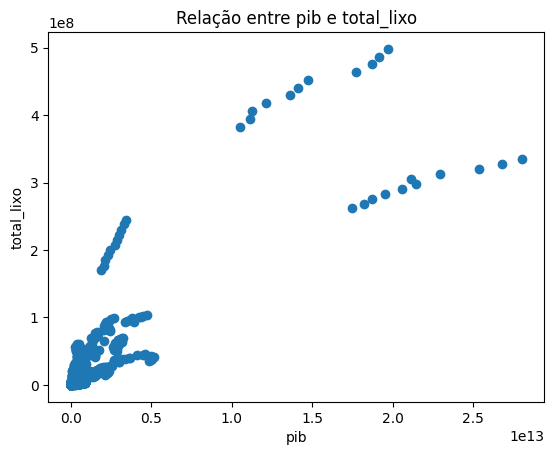

In [61]:
plt.scatter(df['pib'], df['total_lixo'])
plt.title("Relação entre pib e total_lixo")
plt.xlabel("pib")
plt.ylabel("total_lixo")

# Correlação entre o População e a Produção de lixo

In [62]:
correlation_populacao_lixo = df['populacao'].corr(df['total_lixo'])
print("Coeficiente de correlação:", correlation_populacao_lixo)

Coeficiente de correlação: 0.8484537231538799


Text(0, 0.5, 'total_lixo')

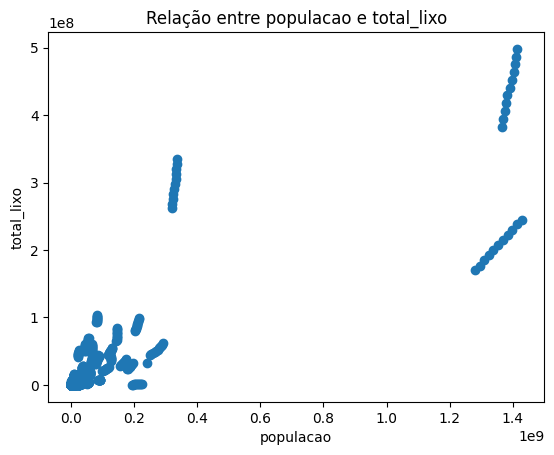

In [58]:
plt.scatter(df['populacao'], df['total_lixo'])
plt.title("Relação entre populacao e total_lixo")
plt.xlabel("populacao")
plt.ylabel("total_lixo")

# Correlação entre o pib e reciclagem

In [64]:
correlation_pib_reciclagem = df['pib'].corr(df['lixo_reciclado'])
print("Coeficiente de correlação:", correlation_populacao_lixo)

Coeficiente de correlação: 0.8484537231538799


Text(0, 0.5, 'lixo_reciclado')

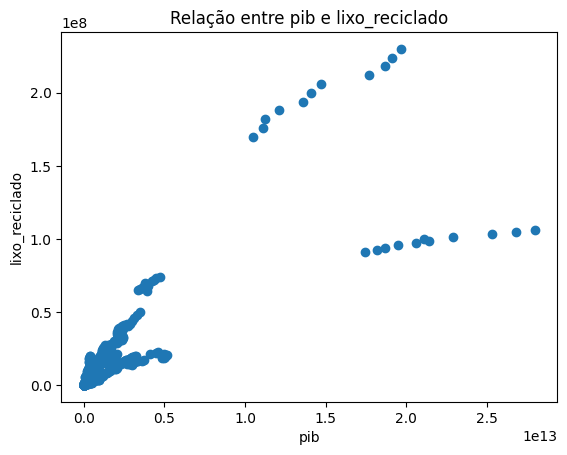

In [65]:
plt.scatter(df['pib'], df['lixo_reciclado'])
plt.title("Relação entre pib e lixo_reciclado")
plt.xlabel("pib")
plt.ylabel("lixo_reciclado")

# Treinamento, Teste, Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = df[['pib', 'populacao']]  # Adicione outras features se necessário
y = df['total_lixo']

# Dividir os dados em treinamento(67%) e teste(33%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

# Criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Prever o valor para 2025
new_data = pd.DataFrame({'pib': [2600000000000], 'populacao': [216000000]})  # Substitua os valores por suas estimativas
predicted_value = model.predict(new_data)

print("Previsão para 2025:", predicted_value[0])

Previsão para 2025: 67803521.97030172
